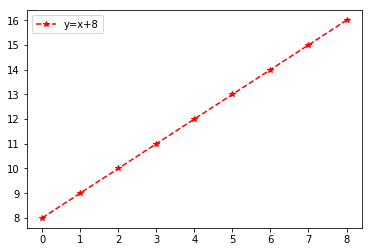

In [6]:
import numpy as np
import matplotlib.pyplot as plt
def print_line_draw():
    x=np.arange(0,9,1)
    y = x +8
    plt.plot(x,y,color="red",linestyle="--",marker="*",label="y=x+8")
    plt.savefig("1.png",dpi=60)
    plt.legend()
    plt.show()
print_line_draw()

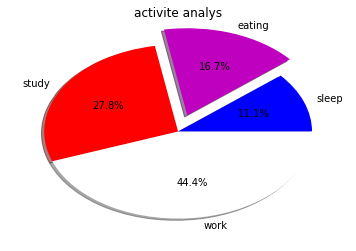

In [7]:
def print_pie_draw():
    sclice=[2,3,5,8] # 这里的数表示占据的比例；
    activite=["sleep","eating","study","work"] # activite为一个数组表示的是这个饼的组分；
    color=['b','m','r','w']
    
    plt.pie(sclice,labels=activite ,
            colors=color,
            startangle=0, 
            shadow=True,
            explode=(0,0.2,0,0),
           autopct='%1.1f%%')
    plt.title("activite analys")# 设置名称
    plt.savefig("2.png") # 保存的图片名称
    plt.show() # 显示函数show；
    
print_pie_draw()

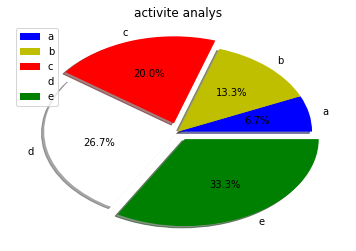

In [43]:
def print_pie_draw_02():
    sclice = [1,2,3,4,5]
    activite = ["a","b","c","d","e"]
    color = ['b','y','r','w','g']# 这三个奠定莉基调，最重要的三个属性，就是比例，类名和区块颜色。
    
    
    patches,l_text,p_text = plt.pie(sclice ,labels = activite ,
            colors = color,
            startangle =0,# #startangle，起始角度，0，表示从0开始逆时针转，为第一块。一般选择从90度开始比较好看
            shadow =True , # 这里的阴影最好别超过0.2，数字太大了会使图变丑。
            explode=(0,0,0.1,0,0.1),# 将某一块突出来，就是爆炸的意思；
            autopct='%1.1lf%%') #autopct，圆里面的文本格式，%1.1lf%%表示小数有一位，整数有一位的浮点数 %3.1lf%% 表示三个整数，一个小数；
    plt.title ("activite analys")
    plt.savefig("3.png")

    
    #改变文本的大小
#方法是把每一个text遍历。调用set_size方法设置它的属性
    for t in l_text:
        t.set_size(10) # 调节文本内容的字数大小；
    for t in p_text:
        t.set_size(10)
# 设置x，y轴刻度一致，这样饼图才能是圆的
    #plt.axis('equal') #有了这个，就会使x和y的轴相对称，
    plt.legend() # 给出图例 
    plt.show()
    
print_pie_draw_02()

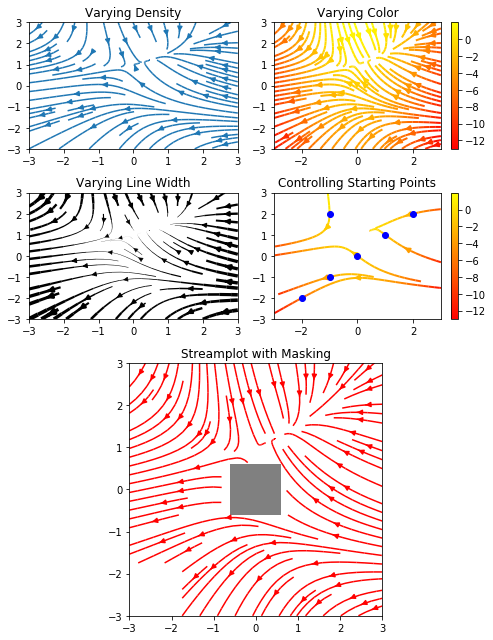

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

w = 3
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U*U + V*V)

fig = plt.figure(figsize=(7, 9))
gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])

#  Varying density along a streamline
ax0 = fig.add_subplot(gs[0, 0])
ax0.streamplot(X, Y, U, V, density=[0.5, 1])
ax0.set_title('Varying Density')

# Varying color along a streamline
ax1 = fig.add_subplot(gs[0, 1])
strm = ax1.streamplot(X, Y, U, V, color=U, linewidth=2, cmap='autumn')
fig.colorbar(strm.lines)
ax1.set_title('Varying Color')

#  Varying line width along a streamline
ax2 = fig.add_subplot(gs[1, 0])
lw = 5*speed / speed.max()
ax2.streamplot(X, Y, U, V, density=0.6, color='k', linewidth=lw)
ax2.set_title('Varying Line Width')

# Controlling the starting points of the streamlines
seed_points = np.array([[-2, -1, 0, 1, 2, -1], [-2, -1,  0, 1, 2, 2]])

ax3 = fig.add_subplot(gs[1, 1])
strm = ax3.streamplot(X, Y, U, V, color=U, linewidth=2,
                     cmap='autumn', start_points=seed_points.T)
fig.colorbar(strm.lines)
ax3.set_title('Controlling Starting Points')

# Displaying the starting points with blue symbols.
ax3.plot(seed_points[0], seed_points[1], 'bo')
ax3.axis((-w, w, -w, w))

# Create a mask
mask = np.zeros(U.shape, dtype=bool)
mask[40:60, 40:60] = True
U[:20, :20] = np.nan
U = np.ma.array(U, mask=mask)

ax4 = fig.add_subplot(gs[2:, :])
ax4.streamplot(X, Y, U, V, color='r')
ax4.set_title('Streamplot with Masking')

ax4.imshow(~mask, extent=(-w, w, -w, w), alpha=0.5,
          interpolation='nearest', cmap='gray', aspect='auto')
ax4.set_aspect('equal')

plt.tight_layout()
plt.show()